In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow import keras


In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

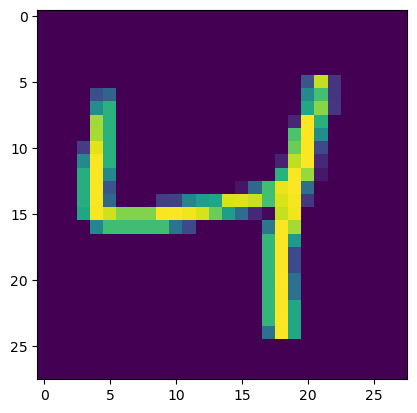

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/opt/anaconda3/envs/dsai/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-19 19:55:44.916221: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-10-19 19:55:44.916278: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-19 19:55:44.916290: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-10-19 19:55:44.916333: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-19 19:55:44.916348: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/rep

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7757 - loss: 16.4406 - val_accuracy: 0.7736 - val_loss: 35.1271
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7780 - loss: 19.0304 - val_accuracy: 0.8301 - val_loss: 13.7596
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7767 - loss: 23.7638 - val_accuracy: 0.8158 - val_loss: 20.9698
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7839 - loss: 24.8274 - val_accuracy: 0.8592 - val_loss: 14.0231
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7837 - loss: 28.4124 - val_accuracy: 0.7972 - val_loss: 23.0185


In [20]:
y = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
y.shape

(10000, 10)

In [27]:
y_pred = y.argmax(axis=1)

In [28]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7935

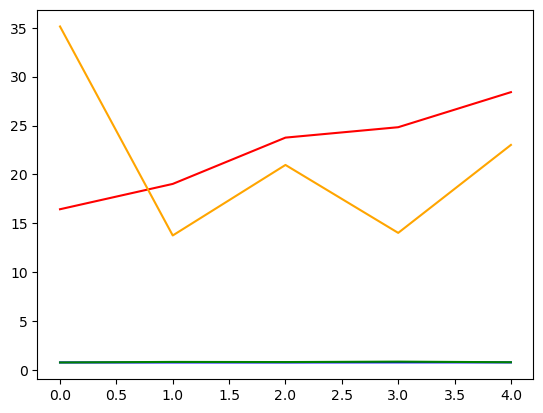

In [34]:
plt.plot(history.history['loss'], c = 'red')
plt.plot(history.history['val_loss'],c='orange')
plt.plot(history.history['accuracy'],c = "blue")
plt.plot(history.history['val_accuracy'],c= 'green')

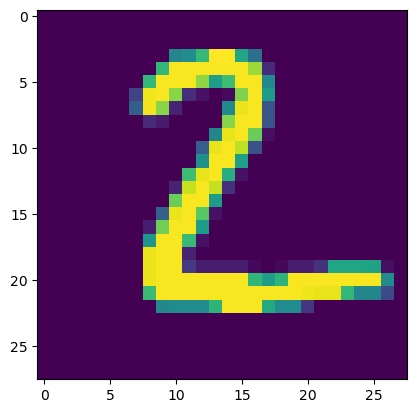

In [35]:
plt.imshow(X_test[1])

In [37]:
pred = model.predict(X_test[1].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [38]:
pred.argmax()

2